### Imports

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth
from sklearn.metrics.cluster import rand_score

### Loading data

In [2]:
features_path = 'CI\\S2\\Features'

def load_data(train_data: bool =True) -> Tuple[np.ndarray, np.ndarray]:
    """
    loads train/test features with image labels.  
    """
    if train_data:
        data = np.load(features_path + '\\train_data.npz')
    else:
        data = np.load(features_path + '\\test_data.npz')

    features = data['features']
    img_labels = data['img_labels']

    return features, img_labels

def load_data_with_domain_label() -> Tuple[np.ndarray, np.ndarray]:
    """
    loads portion of training features with domain label
    """
    data = np.load(features_path + '\\train_data_w_label.npz')
    train_features = data['features']
    domain_labels = data['domain_labels']

    return train_features, domain_labels

### Train Data with image labels
train_features, train_image_labels = load_data(True)
print(train_features.shape)
print(train_image_labels.shape)

### 5% of train data with domain label
train_w_domain_features, train_w_domain_domain_labels = load_data_with_domain_label()
print(train_w_domain_features.shape)
print(train_w_domain_domain_labels.shape)

### Test Data with image labels
test_features, test_image_labels = load_data(False)
print(test_features.shape)
print(test_image_labels.shape)

(20000, 2048)
(20000,)
(1000, 2048)
(1000,)
(10000, 2048)
(10000,)


### This function uses tsne to show high dimentional data in 2D.

In [3]:
def tsne_visualization(data, labels, diagram_name):
    tsne = TSNE(n_components=2, verbose=1, random_state=123, learning_rate='auto', init='pca')
    z = tsne.fit_transform(data)
    df = pd.DataFrame()
    df["labels"] = labels
    df["component-1"] = z[:, 0]
    df["component-2"] = z[:, 1]

    sns.scatterplot(x="component-1", y="component-2", hue=df.labels.tolist(), palette=sns.color_palette("hls", len(np.unique(labels))), data=df).set(title=diagram_name)
    plt.show()

### Visualization of train features using image labels has no meaning.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.034s...
[t-SNE] Computed neighbors for 20000 samples in 16.301s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.256332
[t-SNE] KL divergence after 1000 iterations: 2.059549


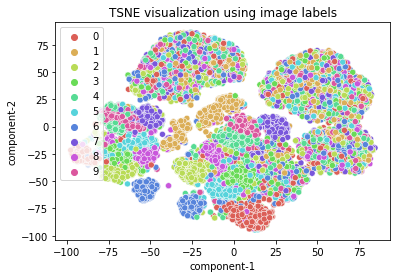

In [4]:
tsne_visualization(train_features, train_image_labels, "TSNE visualization using image labels")

### Let's find optimal cluster number.
# 5!!

Text(0, 0.5, 'WCSS')

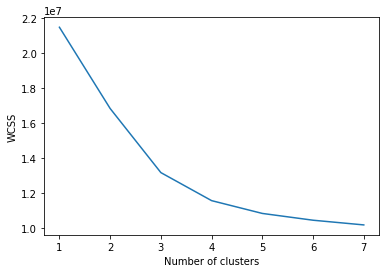

In [5]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_init=12, n_clusters=i, init='k-means++')
    kmeans.fit(train_features)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 8), wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

### Trainig the KMeans model using train data

In [6]:
kmeans = KMeans(n_init=10, n_clusters=5, init='k-means++').fit(train_features)

### Visualization of train features using kmeans clustering seems good.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 20000 samples in 0.034s...
[t-SNE] Computed neighbors for 20000 samples in 16.025s...
[t-SNE] Computed conditional probabilities for sample 1000 / 20000
[t-SNE] Computed conditional probabilities for sample 2000 / 20000
[t-SNE] Computed conditional probabilities for sample 3000 / 20000
[t-SNE] Computed conditional probabilities for sample 4000 / 20000
[t-SNE] Computed conditional probabilities for sample 5000 / 20000
[t-SNE] Computed conditional probabilities for sample 6000 / 20000
[t-SNE] Computed conditional probabilities for sample 7000 / 20000
[t-SNE] Computed conditional probabilities for sample 8000 / 20000
[t-SNE] Computed conditional probabilities for sample 9000 / 20000
[t-SNE] Computed conditional probabilities for sample 10000 / 20000
[t-SNE] Computed conditional probabilities for sample 11000 / 20000
[t-SNE] Computed conditional probabilities for sample 12000 / 20000
[t-SNE] Computed conditional probabilities for sa

C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.256332
[t-SNE] KL divergence after 1000 iterations: 2.059549


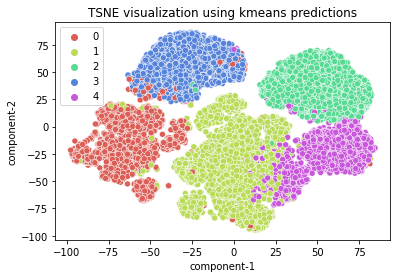

In [7]:
kmeans_predictions = kmeans.predict(train_features)
tsne_visualization(train_features, kmeans_predictions, "TSNE visualization using kmeans predictions")

### Visualization of train features using their actual domain label shows us 2d visualization is relatable.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 8.984195


C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.947048
[t-SNE] KL divergence after 1000 iterations: 0.809754


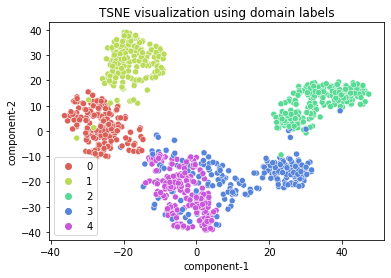

In [10]:
tsne_visualization(train_w_domain_features, train_w_domain_domain_labels, "TSNE visualization using domain labels")

### Visualization of train features using kmeans is similar to real label clustering.

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 1000 samples in 0.002s...
[t-SNE] Computed neighbors for 1000 samples in 0.060s...
[t-SNE] Computed conditional probabilities for sample 1000 / 1000
[t-SNE] Mean sigma: 8.984195


C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 55.947048
[t-SNE] KL divergence after 1000 iterations: 0.809754


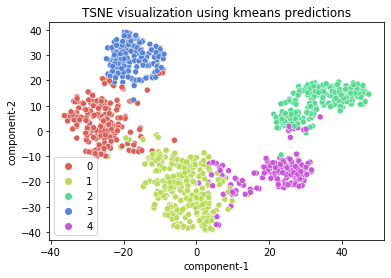

In [12]:
kmeans_predictions = kmeans.predict(train_w_domain_features)
tsne_visualization(train_w_domain_features, kmeans_predictions, "TSNE visualization using kmeans predictions")

# 91% similarity.

In [14]:
kmeans_predictions_list = kmeans_predictions.tolist()
train_w_domain_domain_labels_list = train_w_domain_domain_labels.tolist()
rand_score(kmeans_predictions_list, train_w_domain_domain_labels_list)

0.9196876876876877

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.018s...
[t-SNE] Computed neighbors for 10000 samples in 3.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 6.545841


C:\Program Files\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:982: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  warnings.warn(


[t-SNE] KL divergence after 250 iterations with early exaggeration: 76.975349
[t-SNE] KL divergence after 1000 iterations: 1.706072


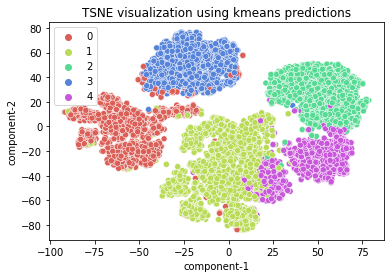

In [16]:
kmeans_predictions = kmeans.predict(test_features)
tsne_visualization(test_features, kmeans_predictions, "TSNE visualization using kmeans predictions")

# 5 Cluster, 5 Domain.